In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

In [ ]:
# Load data
try:
    df = pd.read_csv('insurance.csv')
    print("Dataset loaded successfully")
except:
    import requests
    url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
    df = pd.read_csv(url)
    print("Dataset downloaded from web")

# Basic info
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:\n{df.isnull().sum()}\n")
print(f"Duplicate rows: {df.duplicated().sum()}")

Dataset loaded successfully
Dataset shape: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicate rows: 1


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Basic Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


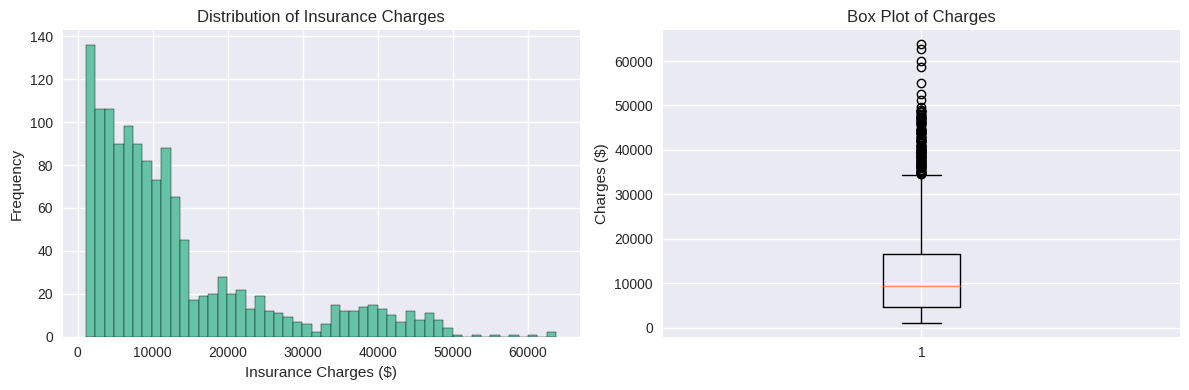


Average charges: $13,270.42
Median charges: $9,382.03
Minimum charges: $1,121.87
Maximum charges: $63,770.43


In [ ]:
# Basic statistics
print("Basic Statistics:")
print(df.describe())

# Target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=50, edgecolor='black', alpha=1)
plt.xlabel('Insurance Charges ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance Charges')

plt.subplot(1, 2, 2)
plt.boxplot(df['charges'])
plt.ylabel('Charges ($)')
plt.title('Box Plot of Charges')

plt.tight_layout()
plt.show()

# Key insights
print(f"\nAverage charges: ${df['charges'].mean():,.2f}")
print(f"Median charges: ${df['charges'].median():,.2f}")
print(f"Minimum charges: ${df['charges'].min():,.2f}")
print(f"Maximum charges: ${df['charges'].max():,.2f}")

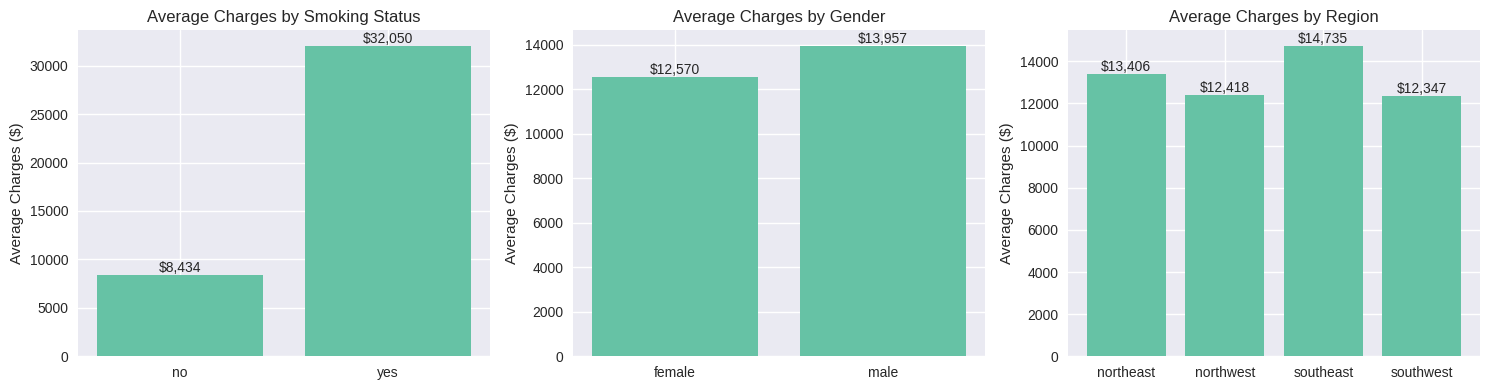

In [ ]:
# Analyze categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Smoker impact
smoker_charges = df.groupby('smoker')['charges'].mean()
axes[0].bar(smoker_charges.index, smoker_charges.values)
axes[0].set_title('Average Charges by Smoking Status')
axes[0].set_ylabel('Average Charges ($)')
for i, v in enumerate(smoker_charges.values):
    axes[0].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# Gender impact
gender_charges = df.groupby('sex')['charges'].mean()
axes[1].bar(gender_charges.index, gender_charges.values)
axes[1].set_title('Average Charges by Gender')
axes[1].set_ylabel('Average Charges ($)')
for i, v in enumerate(gender_charges.values):
    axes[1].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# Region impact
region_charges = df.groupby('region')['charges'].mean()
axes[2].bar(region_charges.index, region_charges.values)
axes[2].set_title('Average Charges by Region')
axes[2].set_ylabel('Average Charges ($)')
for i, v in enumerate(region_charges.values):
    axes[2].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


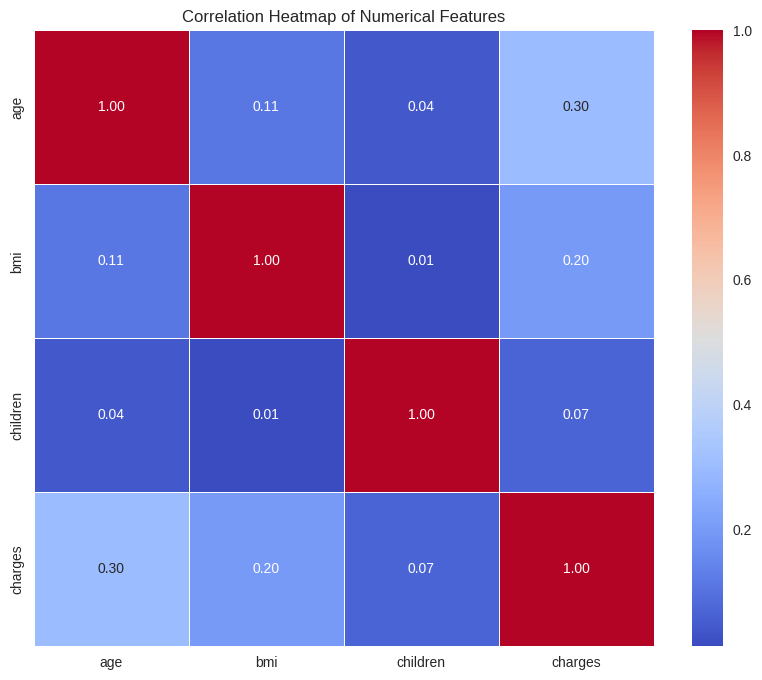

In [ ]:
# Analyze numerical variables

# Correlation matrix
numeric_cols = ['age', 'bmi', 'children', 'charges']
corr_matrix = df[numeric_cols].corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##feature engineering

In [ ]:
# Data cleaning
# Remove duplicates if any
df_clean = df.copy()
if df_clean.duplicated().sum() > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Removed {df.duplicated().sum()} duplicate rows")

# Feature engineering

le_smoker = LabelEncoder()
le_sex = LabelEncoder()

# Encode 'smoker' column
df_clean['smoker'] = le_smoker.fit_transform(df_clean['smoker'])
# Encode 'sex' column
df_clean['gender'] = le_sex.fit_transform(df_clean['sex']) #male:1, female:0

# Create BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df_clean['bmi_category'] = df_clean['bmi'].apply(categorize_bmi)

print(f"\nClean dataset shape: {df_clean.shape}")

Removed 1 duplicate rows

Clean dataset shape: (1337, 9)


In [ ]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges,gender,bmi_category
0,19,female,27.900,0,1,southwest,16884.92400,0,overweight
1,18,male,33.770,1,0,southeast,1725.55230,1,obese
2,28,male,33.000,3,0,southeast,4449.46200,1,obese
3,33,male,22.705,0,0,northwest,21984.47061,1,normal
4,32,male,28.880,0,0,northwest,3866.85520,1,overweight


In [ ]:
# Prepare data for modeling
# Separate features and target
X = df_clean.drop(['charges', 'sex'], axis=1)  # Keep numeric versions
y = df_clean['charges']

# Identify categorical and numerical columns
categorical_cols = ['region', 'bmi_category']
numerical_cols = ['age', 'bmi', 'children', 'smoker', 'gender']

print(f"Features shape: {X.shape}")
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Features shape: (1337, 7)
Categorical columns: ['region', 'bmi_category']
Numerical columns: ['age', 'bmi', 'children', 'smoker', 'gender']


In [ ]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Preprocess data
X_train_processed = preprocessor.fit_transform(X_train) #calc mean and std deviation
X_test_processed = preprocessor.transform(X_test)

print(f"\nAfter preprocessing:")
print(f"X_train shape: {X_train_processed.shape}")
print(f"X_test shape: {X_test_processed.shape}")

Training set: 1069 samples
Testing set: 268 samples

After preprocessing:
X_train shape: (1069, 11)
X_test shape: (268, 11)


In [ ]:
# 1. Simple Linear Regression

print("1. SIMPLE LINEAR REGRESSION")


lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_processed)
y_test_pred_lr = lr_model.predict(X_test_processed)

# Metrics
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)

print(f"Training R²: {lr_train_r2:.4f}")
print(f"Testing R²:  {lr_test_r2:.4f}")
print(f"Testing RMSE: ${lr_test_rmse:,.0f}")
print(f"Testing MAE:  ${lr_test_mae:,.0f}")

# Check coefficients
print(f"\nNumber of features: {len(lr_model.coef_)}")
print(f"Intercept: ${lr_model.intercept_:,.2f}")
print(f"\nTop 5 feature coefficients:")
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_model.coef_})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
print(coef_df.sort_values('Abs_Coefficient', ascending=False).head(5))

1. SIMPLE LINEAR REGRESSION
Training R²: 0.7375
Testing R²:  0.8025
Testing RMSE: $6,024
Testing MAE:  $4,334

Number of features: 11
Intercept: $11,666.44

Top 5 feature coefficients:
                     Feature  Coefficient  Abs_Coefficient
3                     smoker  9232.158196      9232.158196
8         bmi_category_obese  3565.651606      3565.651606
0                        age  3450.304355      3450.304355
10  bmi_category_underweight -2528.693875      2528.693875
7           region_southwest  -769.683464       769.683464


LINEAR REGRESSION: ACTUAL vs. PREDICTED PLOT


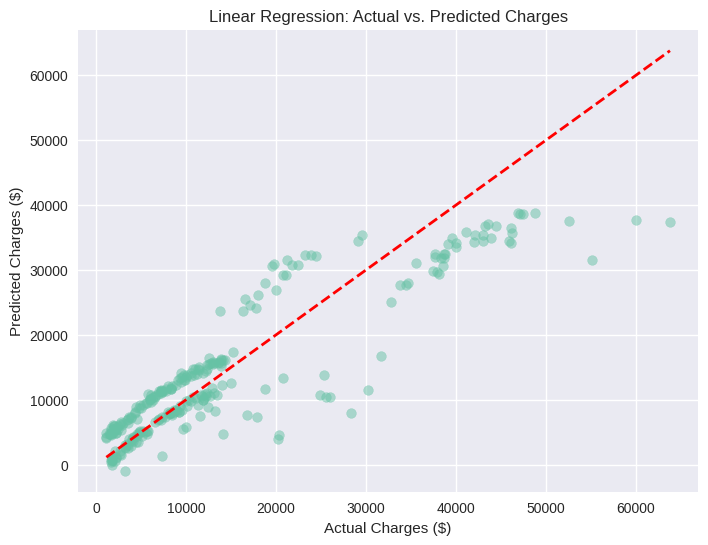

In [ ]:

print("LINEAR REGRESSION: ACTUAL vs. PREDICTED PLOT")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.title('Linear Regression: Actual vs. Predicted Charges')

plt.show()

2. RIDGE REGRESSION (L2 Regularization)
Ridge Regression Results:
      Alpha  Test_R2  Test_RMSE  Coefficients_Sum
0     0.001   0.8025  6023.8534        21942.1355
1     0.010   0.8025  6023.8277        21939.0818
2     0.100   0.8025  6023.5750        21908.7197
3     1.000   0.8027  6021.4555        21621.4631
4    10.000   0.8026  6022.2579        19998.4891
5   100.000   0.7849  6286.3097        16415.4209
6  1000.000   0.5682  8907.3164         9196.5696


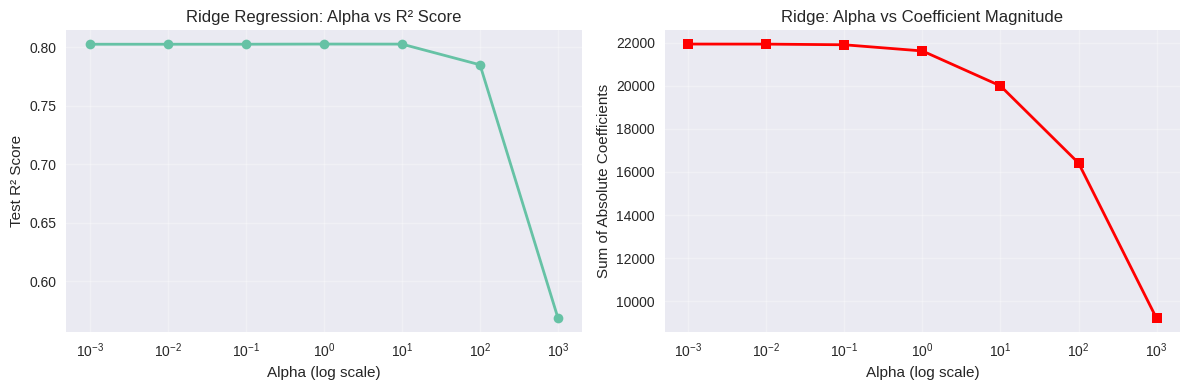


Best Ridge alpha: 1.0
Best Ridge Test R²: 0.8027


In [ ]:
# 2. Ridge Regression with different alpha values
print("2. RIDGE REGRESSION (L2 Regularization)")


# Try different alpha values
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_results = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_processed, y_train)

    y_test_pred = ridge_model.predict(X_test_processed)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    ridge_results.append({
        'Alpha': alpha,
        'Test_R2': test_r2,
        'Test_RMSE': test_rmse,
        'Coefficients_Sum': np.sum(np.abs(ridge_model.coef_))
    })

ridge_df = pd.DataFrame(ridge_results)
print("Ridge Regression Results:")
print(ridge_df.round(4))

# Plot Ridge results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(ridge_df['Alpha'], ridge_df['Test_R2'], 'o-', linewidth=2)
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha (log scale)')
axes[0].set_ylabel('Test R² Score')
axes[0].set_title('Ridge Regression: Alpha vs R² Score')
axes[0].grid(True, alpha=0.3)

axes[1].plot(ridge_df['Alpha'], ridge_df['Coefficients_Sum'], 's-', linewidth=2, color='red')
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha (log scale)')
axes[1].set_ylabel('Sum of Absolute Coefficients')
axes[1].set_title('Ridge: Alpha vs Coefficient Magnitude')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select best alpha
best_ridge_idx = ridge_df['Test_R2'].idxmax()
best_ridge_alpha = ridge_df.loc[best_ridge_idx, 'Alpha']
print(f"\nBest Ridge alpha: {best_ridge_alpha}")
print(f"Best Ridge Test R²: {ridge_df.loc[best_ridge_idx, 'Test_R2']:.4f}")

3. LASSO REGRESSION (L1 Regularization)
Lasso Regression Results:
     Alpha  Test_R2  Test_RMSE  Non_Zero_Coefficients  Coefficients_Sum
0   0.0001   0.8025  6023.8561                     11        21942.4568
1   0.0010   0.8025  6023.8549                     11        21942.2925
2   0.0100   0.8025  6023.8425                     11        21940.6514
3   0.1000   0.8025  6023.7181                     11        21924.2109
4   1.0000   0.8026  6022.5027                     11        21760.2132
5  10.0000   0.8033  6012.4353                     10        20214.7624


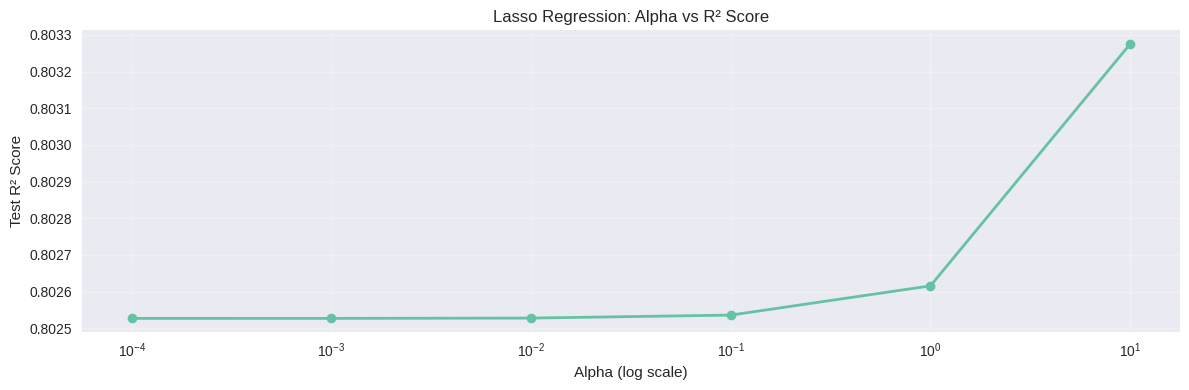


Best Lasso alpha: 10.0
Best Lasso Test R²: 0.8033
Non-zero coefficients at best alpha: 10


In [ ]:
# 3. Lasso Regression with different alpha values

print("3. LASSO REGRESSION (L1 Regularization)")


# Try different alpha values
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lasso_results = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_model.fit(X_train_processed, y_train)

    y_test_pred = lasso_model.predict(X_test_processed)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Lasso can shrink some coefficients to exactly zero
    #non_zero_coef counts how many features are actually used by the model
    non_zero_coef = np.sum(lasso_model.coef_ != 0)

    lasso_results.append({
        'Alpha': alpha,
        'Test_R2': test_r2,
        'Test_RMSE': test_rmse,
        'Non_Zero_Coefficients': non_zero_coef,
        'Coefficients_Sum': np.sum(np.abs(lasso_model.coef_))
    })

lasso_df = pd.DataFrame(lasso_results)
print("Lasso Regression Results:")
print(lasso_df.round(4))

# Plot Lasso results
fig, axes = plt.subplots(1, figsize=(12, 4))

# Corrected: Refer to the single Axes object directly as 'axes'
axes.plot(lasso_df['Alpha'], lasso_df['Test_R2'], 'o-', linewidth=2)
axes.set_xscale('log')
axes.set_xlabel('Alpha (log scale)')
axes.set_ylabel('Test R² Score')
axes.set_title('Lasso Regression: Alpha vs R² Score')
axes.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select best alpha
best_lasso_idx = lasso_df['Test_R2'].idxmax()
best_lasso_alpha = lasso_df.loc[best_lasso_idx, 'Alpha']
print(f"\nBest Lasso alpha: {best_lasso_alpha}")
print(f"Best Lasso Test R²: {lasso_df.loc[best_lasso_idx, 'Test_R2']:.4f}")
print(f"Non-zero coefficients at best alpha: {lasso_df.loc[best_lasso_idx, 'Non_Zero_Coefficients']}")

4. K-NEAREST NEIGHBORS REGRESSION
KNN Regression Results:
    K  Train_R2  Test_R2  Test_RMSE  R2_Difference
0   1    1.0000   0.8055  5978.5831         0.1945
1   3    0.9030   0.8657  4967.4846         0.0373
2   5    0.8822   0.8690  4907.2365         0.0133
3   7    0.8717   0.8775  4745.4417        -0.0057
4   9    0.8647   0.8847  4603.8308        -0.0199
5  11    0.8572   0.8871  4555.3756        -0.0299
6  15    0.8520   0.8820  4656.4232        -0.0300
7  20    0.8463   0.8757  4778.8663        -0.0294
8  30    0.8360   0.8649  4981.9517        -0.0290
9  50    0.8151   0.8453  5331.5312        -0.0302


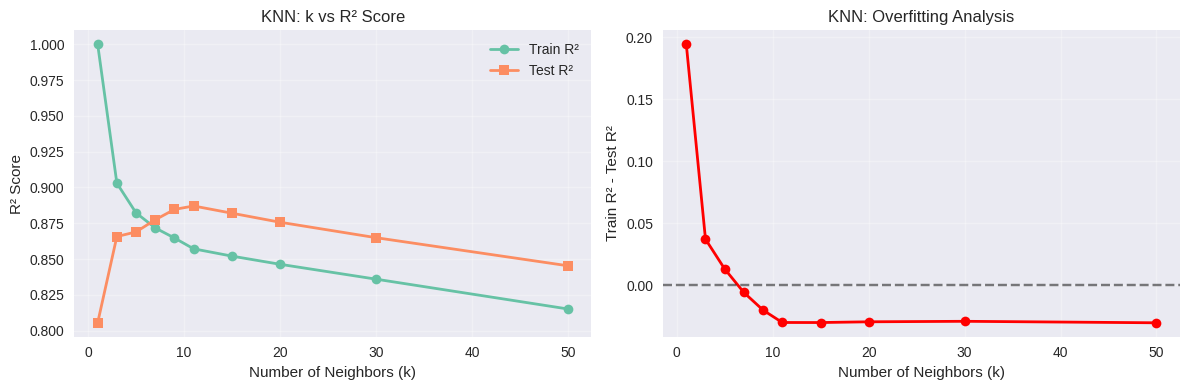


Best KNN k value: 11
Best KNN Test R²: 0.8871
Train R² at best k: 0.8572


In [ ]:
# 4. K-Nearest Neighbors with different k values

print("4. K-NEAREST NEIGHBORS REGRESSION")


# Try different k values
k_values = [1, 3, 5, 7, 9, 11, 15, 20, 30, 50]
knn_results = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_processed, y_train)

    y_train_pred = knn_model.predict(X_train_processed)
    y_test_pred = knn_model.predict(X_test_processed)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    knn_results.append({
        'K': k,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Test_RMSE': test_rmse,
        'R2_Difference': train_r2 - test_r2
    })

knn_df = pd.DataFrame(knn_results)
print("KNN Regression Results:")
print(knn_df.round(4))

# Plot KNN results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# R² scores
axes[0].plot(knn_df['K'], knn_df['Train_R2'], 'o-', linewidth=2, label='Train R²')
axes[0].plot(knn_df['K'], knn_df['Test_R2'], 's-', linewidth=2, label='Test R²')
axes[0].set_xlabel('Number of Neighbors (k)')
axes[0].set_ylabel('R² Score')
axes[0].set_title('KNN: k vs R² Score')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Overfitting analysis
axes[1].plot(knn_df['K'], knn_df['R2_Difference'], 'o-', linewidth=2, color='red')
axes[1].set_xlabel('Number of Neighbors (k)')
axes[1].set_ylabel('Train R² - Test R²')
axes[1].set_title('KNN: Overfitting Analysis')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select best k
best_knn_idx = knn_df['Test_R2'].idxmax()
best_k = knn_df.loc[best_knn_idx, 'K']
print(f"\nBest KNN k value: {best_k}")
print(f"Best KNN Test R²: {knn_df.loc[best_knn_idx, 'Test_R2']:.4f}")
print(f"Train R² at best k: {knn_df.loc[best_knn_idx, 'Train_R2']:.4f}")

In [ ]:
# Final models with best hyperparameters
models = {
    "Linear Regression": lr_model,  # already trained
    f"Ridge (alpha={best_ridge_alpha})": Ridge(alpha=best_ridge_alpha, random_state=42),
    f"Lasso (alpha={best_lasso_alpha})": Lasso(alpha=best_lasso_alpha, random_state=42, max_iter=10000),
    f"KNN (k={best_k})": KNeighborsRegressor(n_neighbors=best_k)
}

results = []

for name, model in models.items():

    # Train only models that are NOT already trained
    if name != "Linear Regression":
        model.fit(X_train_processed, y_train)

    # Predictions
    y_pred = model.predict(X_test_processed)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({
        "Model": name,
        "R²": r2,
        "MSE": mse,
        "RMSE": rmse
    })

# Create DataFrame
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values("R²", ascending=False).reset_index(drop=True)

print("\nModel Performance Comparison:")
display(comparison_df.round(4))


Model Performance Comparison:


,Model,R²,MSE,RMSE
0,KNN (k=11),0.8871,2.075145e+07,4555.3756
1,Lasso (alpha=10.0),0.8033,3.614938e+07,6012.4353
2,Ridge (alpha=1.0),0.8027,3.625793e+07,6021.4555
3,Linear Regression,0.8025,3.628684e+07,6023.8562


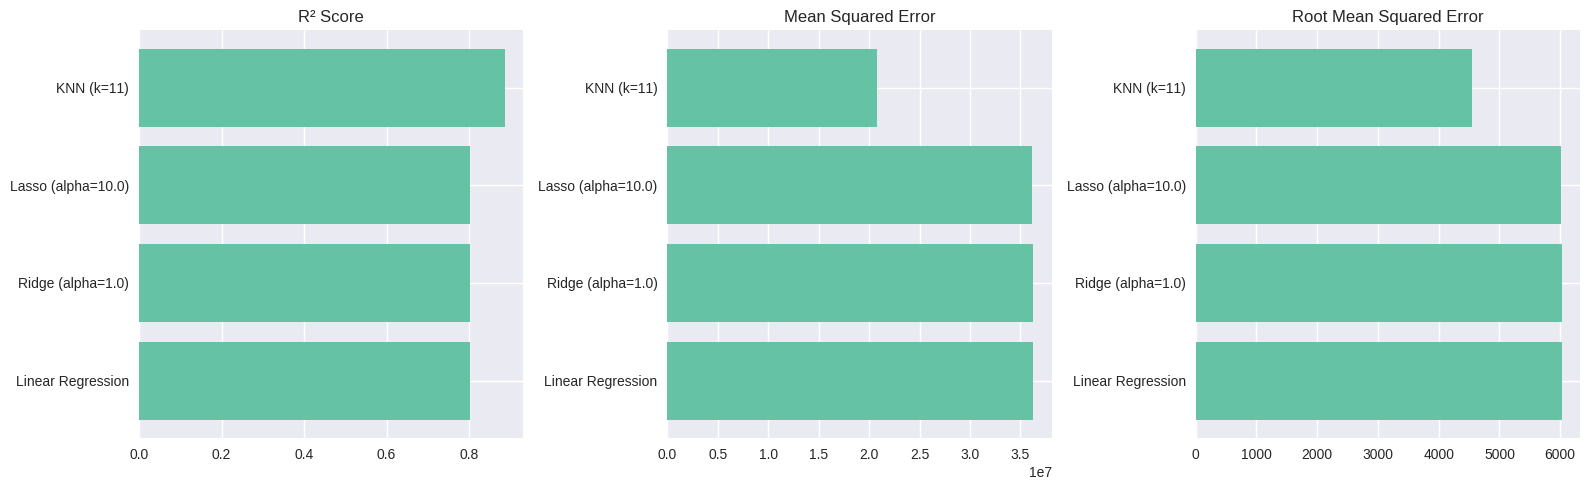

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# R²
axes[0].barh(comparison_df["Model"], comparison_df["R²"])
axes[0].set_title("R² Score")
axes[0].invert_yaxis()

# MSE
axes[1].barh(comparison_df["Model"], comparison_df["MSE"])
axes[1].set_title("Mean Squared Error")
axes[1].invert_yaxis()

# RMSE
axes[2].barh(comparison_df["Model"], comparison_df["RMSE"])
axes[2].set_title("Root Mean Squared Error")
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()